# Model Evaluation / Comparison

In [1]:
# my virtual environments are rarely properly connected to jupyter so this fixes that. 
# you prolly won't need this cell but running it won't hurt anything either
import sys
import os
current_dir = os.getcwd()  # Get the current working directory
venv_dir = os.path.join(current_dir, 'venv') 
python_version = str(sys.version_info.major) + '.' + str(sys.version_info.minor)
site_packages_path = os.path.join(venv_dir, 'lib', 'python' + python_version, 'site-packages')
sys.path.append(site_packages_path) 

In [2]:
import torch
from model_comparison import plot_column_from_csv, evaluate_models

In [3]:
models_to_compare = [
    'templateGPT_1m_attoGPT2',
    'templateGPT_1m_attoLlama3',
    '2024-07-03|02-01-21'
]

### first up we'll look at loss curves

notice they're so in-sync at so many places because we went through the dataset in-order rather than shuffling it

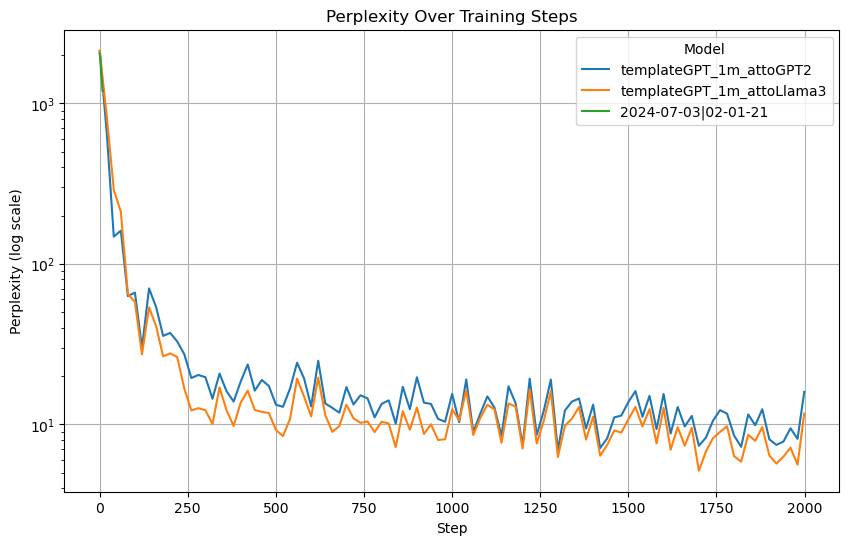

In [4]:
plot_column_from_csv(models_to_compare, 'Step', 'Perplexity', log_y=True)

### now let's compare individual token accuracies
we'll compare topk teacher-forcing accuracies since these models really aren't good enough to be looking at actual inference output

In [5]:
results = evaluate_models(models_to_compare, dataset_name = 'noanabeshima/TinyStoriesV2', topk = 5, batch_size = 100)

In [6]:
# Display the results for each model
import pandas as pd

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(results.items()), columns=['Model', 'Top-k Accuracy'])

# Convert decimal percentages to formatted strings
df['Top-k Accuracy'] = df['Top-k Accuracy'].apply(lambda x: f"{x:.2%}")

# Display the DataFrame
print(df.to_string(index=False))


                    Model Top-k Accuracy
  templateGPT_1m_attoGPT2         76.30%
templateGPT_1m_attoLlama3         79.41%
      2024-07-03|02-01-21          8.87%


# in the future it'd be cool to build out an automated GPT-4 rater like what they used in the TinyStories paper

# also once the hyperparameter search module is working i should build a system that performs a regression on the hyperparameters tested to predict teacher-forcing topk accuracy. likely need to include both linear, quadratic, & interaction terms in the regression and then do a lasso to remove useless terms